## Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import librosa
import scipy 
from scipy.io import wavfile
import IPython.display as ipd
import os

##################### OSC libraries #########################
import argparse #to properly understand incoming OSC messages 
from pythonosc import dispatcher # allow us to catch and map input from osc 
from pythonosc import osc_server # to create osc messages 
from pythonosc import osc_message_builder #to create adress-value massages 
from pythonosc import udp_client# allow us to listen from messages 
from pythonosc.osc_server import ThreadingOSCUDPServer

## Loading the sEMG arrays

In [ ]:
############################################# USANDO IL FILE EXPO CSV ##############################################
firstAcqisitionPath= 'C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\myFirstAcquisition\\firstAcquisition.csv' #comma separated value
#I read it wiht pandas 
dataFrame_row= pd.read_csv(firstAcqisitionPath, sep= ';')
Avambraccio_est_Sx= dataFrame_row[' Avambraccio est Sx ']

#Avambraccio_est_Sx= dataFrame_row.iloc[:,3] #accedo alla colonna con indice 3 associata con l'avambraccio est SX
print(Avambraccio_est_Sx)
#npDataFrame_row= np.asarray(dataFrame_row['TIMESTAMP'])
#print(npDataFrame_row)

############################################## USANDO IL FILE EXPO .XLSX ######################################################################
exportExl_normal =  "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\Recordings\Davide_Lionetti\REC_OTHER_20221219_181331\\rawEMG_firstTry.xlsx"
sheet= "Sheet1" #exel sheet name
dataFrame_normal = pd.read_excel(io=exportExl_normal, sheet_name=sheet)



In [ ]:
exportExel_rms= "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\Recordings\Davide_Lionetti\REC_OTHER_20221219_181331\\RMSEmg_firstTry.xlsx"
sheet= "Sheet1"
dataFrame_rms = pd.read_excel(io= exportExel_rms, sheet_name=sheet)

npdf_rms = np.asarray(dataFrame_rms) #packing the exel sEMG rms vectors into a numpy array
npdf_normal = np.asarray(dataFrame_normal) #packing the exel sEMG rms vectors into a numpy array

print("npdf_rms = \n{}".format(npdf_rms[1:20, 1:10]))
print("npdf_normal= \n{}".format(npdf_normal[1:20, 1:10]))
sr=1000  #Hz

print("shape npdf_rms = {}".format(np.shape(npdf_rms)))
print("shape npdf_normal = {}".format(np.shape(npdf_normal)))
left_outer_forearm_rms = npdf_rms.T[1, 1:] # traspose for non se lo ricorda salto prima riga e colonna degli indici 
left_outer_forearm_normal = npdf_normal.T[1, 1:]

#the sEmg signal of the right outer forearm muscle
right_outer_forearm_rms = npdf_rms.T[2, 1:] # traspose for non se lo ricorda salto priam riga e colonna degli indici 
right_outer_forearm_normal = npdf_normal.T[2, 1:]

#the sEmg signal of the right iner forearm muscle
right_inner_forearm_rms = npdf_rms.T[4, 1:] # traspose for non se lo ricorda salto priam riga e colonna degli indici 
right_inner_forearm_normal = npdf_normal.T[4, 1:]


s_rms_lenght = left_outer_forearm_rms.shape[0]
s_rms_duration = (1/sr)*s_rms_lenght
s_rms_instants = np.arange(0, s_rms_lenght)*1/sr

s_normal_lenght = left_outer_forearm_normal.shape[0]
s_normal_duration = (1/sr)*s_normal_lenght
s_normal_instants = np.arange(0, s_normal_lenght)*1/sr
print('the normal length: ', s_normal_lenght, ' the rms length: ',s_rms_lenght)

#normalizzazione  
left_outer_forearm_rms_normalized = left_outer_forearm_rms / np.max(left_outer_forearm_rms)
left_outer_forearm_normal_normalized = left_outer_forearm_normal / np.max(left_outer_forearm_normal)

right_outer_forearm_rms_normalized = right_outer_forearm_rms / np.max(right_outer_forearm_rms)
right_outer_forearm_normal_normalized = right_outer_forearm_normal / np.max(right_outer_forearm_normal)

right_inner_forearm_rms_normalized = right_inner_forearm_rms / np.max(right_inner_forearm_rms)
right_inner_forearm_normal_normalized = right_inner_forearm_normal / np.max(right_inner_forearm_normal)


### Plotting 

In [ ]:

######################### PRINTING THE rms sEMG #########################
print("Original Duration: {} seconds".format(s_rms_duration))
print("Original Duration: {} seconds".format(s_normal_duration))
fig=plt.figure(figsize=(12,10))
# set the spacing between subplots
#fig.tight_layout(pad= 10)
plt.subplots_adjust(wspace= 0.3, hspace= 0.3) # to adjust the padding  [w,h] between different subplots 

#fig = plt.subplots(3,2,sharex=True, sharey=True) # se vuoi creare una sublotS figure e poi aggiungere ogni volta una usa subplotS se no usa solo subplot (senze s) 
plt.subplot(3,2,1)
plt.plot(s_rms_instants, left_outer_forearm_rms)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('RMS sEMG left outer forearm')

print("Original Duration: {} seconds".format(s_rms_duration))
print("Original Duration: {} seconds".format(s_normal_duration))
#plt.figure(figsize=(10,6))
plt.subplot(3,2,2)
plt.plot(s_rms_instants, right_outer_forearm_rms)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('RMS sEMG right outer forearm')

print("Original Duration: {} seconds".format(s_rms_duration))
print("Original Duration: {} seconds".format(s_normal_duration))
#plt.figure(figsize=(10,6))
plt.subplot(3,2,3)
plt.plot(s_rms_instants, right_inner_forearm_rms)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('RMS sEMG right inner forearm')


######################### PRINTING THE NORMAL sEMG #########################

#plt.figure(figsize=(10,6))
plt.subplot(3,2,4)
plt.plot(s_normal_instants, left_outer_forearm_normal)
plt.autoscale(enable=True, axis='x', tight=True)
#plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('raw sEMG left outer forearm')

#plt.figure(figsize=(10,6))
plt.subplot(3,2,5)
plt.plot(s_normal_instants, right_outer_forearm_normal)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('raw sEMG right outer forearm')

#plt.figure(figsize=(10,6))
plt.subplot(3,2,6)
plt.plot(s_normal_instants, right_inner_forearm_normal)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('raw sEMG right iner forearm')


## Smoothing function



Text(0.5, 1.0, 'RMS sEMG left outer forearm filtered')

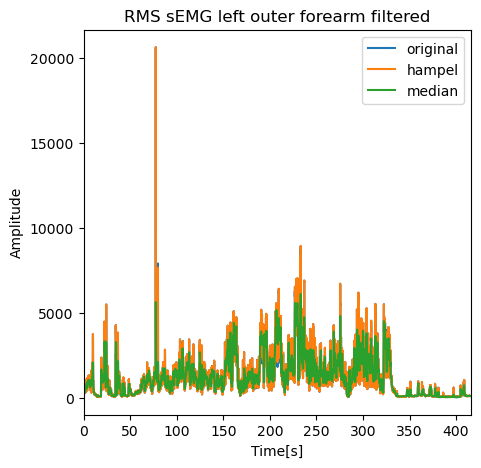

In [6]:
def hampel(input, neighbors=3, nsigma=3):

    # I want to implement it in order that if the input is a matrix, then the function treats each column of the input as an independent channel.

    """Applies a Hampel identifier to the input vector to detect and remove outliers. 
        For each sample of the input, the function computes the median of a window composed of the sample and its 2 * "neighbors" surrounding samples, "neighbors" per side. 
        It also estimates the standard deviation of each sample about its window median using the Median Absolute Deviation. 
        If a sample differs from the median by more than "nsigma" standard deviations, it is replaced with the median. 
        
        Args:
            input: numpy vector
            neighbors (int): specifies the number of neighbors on either side of each sample
            nsigma (int): specifies a number of standard deviations by which a sample must differ from the local median for it to be replaced with the median

        Returns:
            output: copy of the input without outliers
            indices: array that contains the indices of the removed outliers
            medians: array that contains the medians of each sample
            sigmas: array that contains the standard deviations of each sample
    """

    # should put an if statement
    # checking that the input is a numpy array
    input = np.asarray(input)

    # Initializing outputs
    output = []
    indices = []
    medians = []
    sigmas = []
    n = len(input)
    temp_input = []
    K = 1.4826 # write formula 1 / (np.sqrt(2) * np.pow(erf, -1) * 0.5) ?

    for i in range(n):

        # Near the sequence endpoints, the function truncates the window used to compute median and sigma
        if i < neighbors + 1:
            for j in range(2 * neighbors + 1 - (neighbors - i)):
                temp_input.append(input[j])
            temp_array = np.asarray(temp_input)
        elif i > n - (neighbors + 1):
            for j in range(2 * neighbors - (neighbors - (n - i))):
                temp_input.append(input[i - (neighbors + 1) + j])
            temp_array = np.asarray(temp_input)

        # Far sequence endpoints (standard) behavior
        else:
            for j in range(2*neighbors+1):
                temp_input.append(input[i - neighbors + j])
            temp_array = np.asarray(temp_input)


        median = np.median(temp_array)  # Local Median
        sd = K * np.median(np.abs(temp_array - median))  # Standard Deviation, sd / K should be the MAD

        if np.abs(input[i] - median) > nsigma * sd:
            # For a given threshold "nsigma" the Hampel identifier delcares the sample an outlier and replace it with its median
            output.append(median)
            indices.append(i)
        else:
            output.append(input[i])
        medians.append(median)
        sigmas.append(sd)
        temp_input.clear()


    return np.asarray(output), np.asarray(indices), np.asarray(medians), np.asarray(sigmas)

smoothed_signal, indices, median_signal, signma_signal= hampel(left_outer_forearm_rms,neighbors=250, nsigma=3)

plt.figure(figsize=(5,5)) 
plt.plot(s_rms_instants, left_outer_forearm_rms)
plt.plot(s_rms_instants, smoothed_signal)
plt.plot(s_rms_instants, median_signal)
#plt.plot(s_rms_instants, left_outer_forearm_rms) #stampare questo per il groundtrouth
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['original', 'hampel', 'median'])
#plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlabel('Time[s]')
plt.title('RMS sEMG left outer forearm filtered')


## ChatGPT TAKEO filtering

(416161, 1)
threshold:  2476.9243037042434 mean:  1246.0303907388877 standard deviation:  1230.8939129653554


Text(0.5, 1.0, 'RMS sEMG left outer forearm filtered')

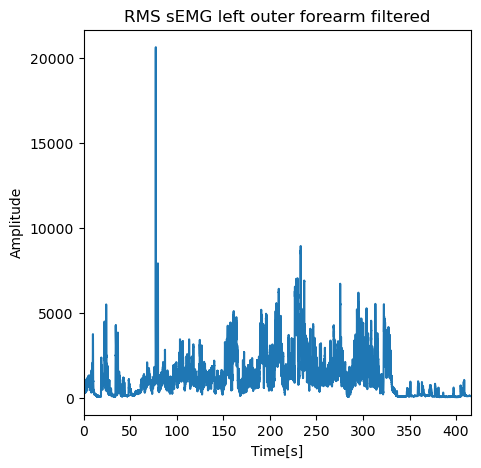

In [7]:
# carica il segnale EMG

emg_signal = left_outer_forearm_rms.reshape(left_outer_forearm_rms.size,1) #should be a np array
#emg_signal= np.ravel(emg_signal)
print(np.shape(emg_signal))
 

# calcola la soglia in base alla deviazione standard

threshold = np.mean(emg_signal) + np.std(emg_signal)
print('threshold: ', threshold, 'mean: ', np.mean(emg_signal),'standard deviation: ', np.std(emg_signal))


# elimina gli spike con la soglia

tkeo_signal = np.abs(np.diff(emg_signal)) ** 2

filtered_signal = np.where(tkeo_signal > threshold, 0, emg_signal)
plt.figure(figsize=(5,5)) 
plt.plot(s_rms_instants, emg_signal)
#plt.plot(s_rms_instants, left_outer_forearm_rms) #stampare questo per il groundtrouth
plt.autoscale(enable=True, axis='x', tight=True)
#plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlabel('Time[s]')
plt.title('RMS sEMG left outer forearm filtered')


### Computing the envelope

Prova a fare un butterworth low pass filter per ottener l'envelope o fai un lpf in max 


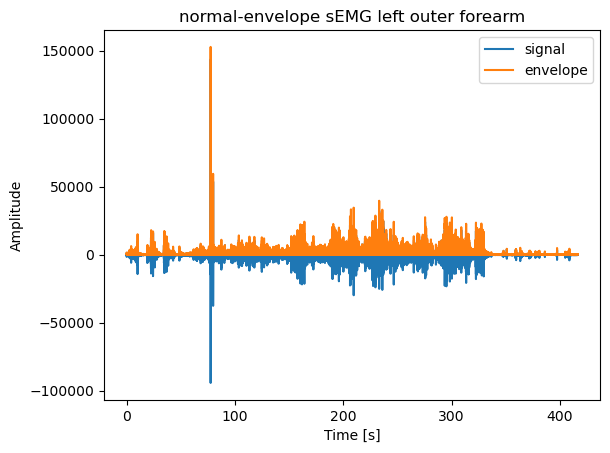

In [8]:
from scipy.signal import hilbert 

left_outer_forearm_normal_analyticSignal = scipy.signal.hilbert(left_outer_forearm_normal)
left_outer_forearm_normal_amplitude_envelope = np.abs(left_outer_forearm_normal_analyticSignal)

plt.plot(figsize=(10,6))

plt.plot(s_normal_instants, left_outer_forearm_normal, label='signal')

plt.plot(s_normal_instants, left_outer_forearm_normal_amplitude_envelope, label='envelope')
#plt.plot(s_normal_instants, signal_bicep_Dx_normal_amplitude_envelope)
#plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('normal-envelope sEMG left outer forearm')
plt.legend()


## Smooting operation 
I want to cutt off the spikes, applying a moving avarege. The signal is rescostructed taking for each sample the average on N near samples, samples out of a rage can be discarded and interpolated. Accordingly, median filtering discards points that differ considerably from their surroundings


PEAKS FOUND:   Avambraccio est Sx  	 2
[ 77500.57530396 231761.57060097] [ 78024.90112648 240157.82226088]


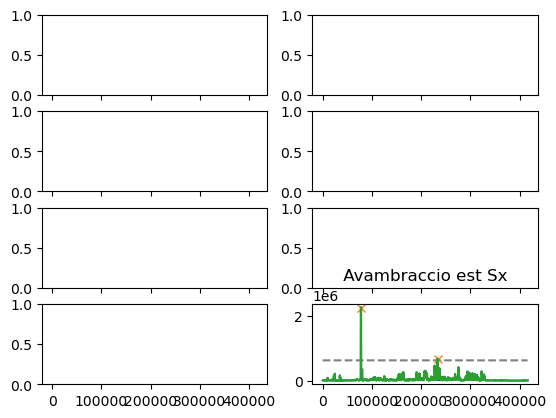

In [8]:
from scipy.signal import butter, lfilter, peak_widths, peak_prominences
import peakutils
def butter_bandpass(lowcut, highcut, fs, order):
    """returns butterworth filter coefficients
    
    Args:
        lowcut(int,float): low cutoff frequency
        highcut(int,float): high cutoff frequency
        fs(int): sampling frequency
        order(int,optional): order of the filter, default value {5}
 
    Returns: 
        ndarray: Numerator polynomials of the IIR filter
    Returns:
        ndarray: Denominator polynomials of the IIR filter
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    """returns the filtered signal after butterworth filter is applied
    
    Args:
        data (array_like): original signal
        lowcut(int,float): low cutoff frequency
        highcut(int,float): high cutoff frequency
        fs(int): sampling frequency
        order(int,optional): order of the filter, default value {3}

    Returns:
        array_like: output of the digital filter
    """
    b , a = butter_bandpass(lowcut, highcut, fs, order)
    #b= int(b)
    #a= int(a)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=2):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=2):
    b, a = butter_lowpass(cutoff, fs, order=2)
    y = lfilter(b, a, data)
    return y

def treshold_detection(data):
    #data = data[treshold_start:treshold_end]
    # data = data[35:85]
    data.index = range(0, data.shape[0])
    mean = data.mean()
    std = data.std()
    cost = 10
    treshold = mean + cost*std
    return treshold

nrows=3
ncols=1
fig, axs = plt.subplots(nrows=4,ncols=2, sharex=True) #When stacking in two directions, the returned axs is a 2D NumPy array.
rel_height = 0.96
def TKEO_processing(data, muscle_to_plot, relative_height, i_plot, j_plot):
    """
    returns the filtered signal after TKEO filtering
    
    Args:
        data (array_like): original signal
        muscle_to_plot (list of string): list of muscles for the plotting 
        relative_height(..): bho non lo so 
    Returns:
        peaks_found: list of couple muscle-num_peaks_found 
        left_ips1: 
        right_ips1: 
       
    """
    npArrayData= np.asarray(data)
    data.index = range(0, data.shape[0])

    # BUTTER BANDPASS
    data_bandpass = butter_bandpass_filter(npArrayData, 20, 499, 1000, 3)
    data_bandpass = pd.DataFrame(data_bandpass, columns=[muscle_to_plot])
    
    # TKEO
    data_TKEO = []
    for i in range (1, len(data_bandpass)-1):
        tkeo_i = pow(data_bandpass[muscle_to_plot][i], 2) - data_bandpass[muscle_to_plot][i-1]*data_bandpass[muscle_to_plot][i+1]
        data_TKEO.append(tkeo_i)

    data_TKEO = pd.DataFrame(data_TKEO, columns=[muscle_to_plot])
    # RECTIFICATION
    data_TKEO = abs(data_TKEO)

    # LOW PASS FILTER 50 Hz 2nd Order
    data_TKEO_filtered = butter_lowpass_filter(data_TKEO, 50, 1000)
    data_TKEO_filtered = pd.DataFrame(data_TKEO_filtered, columns=[muscle_to_plot])

    # MOVING AVERAGE
    data_TKEO_filtered = pd.DataFrame.rolling(data_TKEO_filtered, 500).mean()

    # TRESHOLD
    height_threshold = np.round(treshold_detection(data_TKEO_filtered))

    peaks_found = peakutils.peak.indexes(data_TKEO_filtered[muscle_to_plot], thres_abs=True, thres=int(height_threshold), min_dist=9000)
    average_pf1 = np.mean(data_TKEO_filtered[muscle_to_plot][peaks_found])

    print('PEAKS FOUND: ', muscle_to_plot, '\t', len(peaks_found))
    # print(df_ErectorSpinaeSx[muscle_to_plot][peaks_found])
    axs[i_plot, j_plot].plot(data_TKEO_filtered[muscle_to_plot])
    axs[i_plot, j_plot].plot(peaks_found, data_TKEO_filtered[muscle_to_plot][peaks_found], 'x')
    axs[i_plot, j_plot].plot(np.full_like(data_TKEO_filtered, height_threshold), "--", color="gray")
    axs[i_plot, j_plot].set_title(muscle_to_plot)

    prominences, left_bases, right_bases = peak_prominences(data_TKEO_filtered[muscle_to_plot], peaks_found)
    widths, h_eval, left_ips1, right_ips1 = peak_widths(
        data_TKEO_filtered[muscle_to_plot], peaks_found, 
        rel_height=relative_height,
        prominence_data=(prominences, left_bases, right_bases)
    )
    for i in range (0, len(h_eval)):
        axs[i_plot, j_plot].hlines(y=h_eval[i], xmin=left_ips1[i], xmax=right_ips1[i], color="blue")

    axs[i_plot, j_plot].plot(data_TKEO_filtered)
    print("left ips1: ",left_ips1,"right ips1: ", right_ips1)
    return peaks_found, left_ips1, right_ips1

takeo_peaks_position = TKEO_processing(dataFrame_row[' Avambraccio est Sx '], ' Avambraccio est Sx ', rel_height, nrows, ncols)



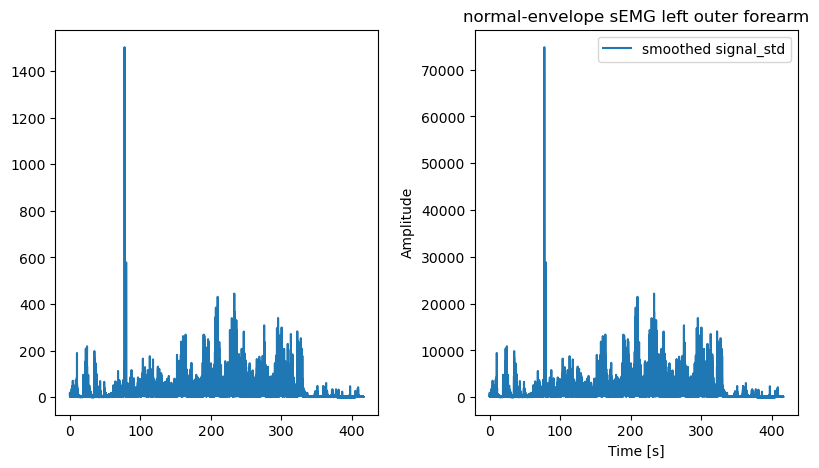

In [8]:




#apply the moving average of pandas, so we need to convert the npArray to pandas dataframe
dataframe = pd.DataFrame(left_outer_forearm_normal)

smoothed_signal= dataframe.rolling(100000).mean()
smoothed_signal_std= dataframe.rolling(10).std()
butterLowpass_signal_std= butter_lowpass_filter(smoothed_signal_std, cutoff= 50, fs= sr, order=2)


plt.figure(figsize= (15,5))
plt.subplots_adjust(wspace= 0.3) # to adjust the padding between different subplots 

#plt.plot(s_rms_instants, left_outer_forearm_rms, label=' rms signal')
ax1=plt.subplot(1,3,1)

plt.plot(s_normal_instants, butterLowpass_signal_std, label='smoothed signal') #devi farli matchar le dimensioni
ax2= plt.subplot(1,3,2)

plt.plot(s_normal_instants, smoothed_signal_std, label='smoothed signal_std') #devi farli matchar le dimensioni
#plt.plot(dataFrame_rms["RMS_ Avambraccio est Sx "].lenght(), smoothed_signal, label='smoothed signal')
#plt.plot(s_normal_instants, signal_bicep_Dx_normal_amplitude_envelope)
#plt.autoscale(enable=True, axis='x', tight=True)
plt.subplots_adjust(wspace= 0.3) # to adjust the padding between different subplots 
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('normal-envelope sEMG left outer forearm')
plt.legend()


## OSC instantiation


In [ ]:
def sEmg1_mapping(unused_addr, args, client):
    print("sEMG1 received") 
    client.send_message("/sEmg_1_received", "value")


# we need to set up the main python methods, dealing with the main python thread first 
if __name__ == "__main__":
    #if you are the python main thread then we are going to set up the catchng and sending of OSC messages
    #Set OSC port
    ip = "127.0.0.1" #specila ip to send message only into your computer loval ip adress
    sendPort = 57121 #check the port later 
    inPort= 8000 #check later 
    #sending osc messages 
    client = udp_client.SimpleUDPClient(ip,sendPort)

    #cathces OSC messages 
    dispatcher = dispatcher.Dispatcher()
    #now we create the message names
    dispatcher.map("/sEmg1", sEmg1_mapping) #message name, function to call 

    #setting up a server
    server = ThreadingOSCUDPServer((ip, inPort), dispatcher)
    print("server is on {}.".format(server.server_address))
    #server.serve_forever() #costantily listening for messages 
    #server.kill()

    #provare a mandare l'array signal_bicep_Dx
     
    for i in range(len(left_outer_forearm_rms_normalized)):
        
        client.send_message("/rms_BiceptDx", left_outer_forearm_rms_normalized[i])
        client.send_message("/normal_BiceptDx",left_outer_forearm_normal_normalized[i])
        print("sending the rms value: " , left_outer_forearm_rms_normalized[i], " sending the normal value:", left_outer_forearm_normal_normalized[i])
        


 